In [0]:
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Activation,Conv2D,MaxPool2D,UpSampling2D,Flatten,Dense,InputLayer,Reshape
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10,mnist

In [0]:
(x_train,_),(x_test,_) = cifar10.load_data()
x_train = x_train.astype('float32')/256
x_test = x_test.astype('float32')/256

In [0]:
x_train.shape
#x_train = x_train.reshape(-1,28,28,1)#
x_train = x_train.reshape(-1,32,32,3)
x_test = x_test.reshape(-1,32,32,3)

In [0]:
input_img = Input(shape = (32,32,3))

In [0]:
def build_model(img_size,comp_size):

      encode = Sequential()
      encode.add(InputLayer(img_size))
      encode.add(Flatten())
      encode.add(Dense(comp_size))


      decode = Sequential()
      decode.add(InputLayer((comp_size,)))
      decode.add(Dense(3072))
      decode.add(Reshape(img_size))

  return decode,encode


In [26]:
decoder,encoder = build_model((32,32,3),32)
inp = Input((32,32,3))
en = encoder(inp)
decoder = decoder(en)
#reconstruct = reconstruct(in)

autoencoder=Model(inp,decoder)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta',loss = 'mse')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
sequential_19 (Sequential)   (None, 32)                98336     
_________________________________________________________________
sequential_20 (Sequential)   (None, 32, 32, 3)         101376    
Total params: 199,712
Trainable params: 199,712
Non-trainable params: 0
_________________________________________________________________



In [0]:
en = Conv2D(64,(3,3),activation='relu', padding='same')(input_img)
en = MaxPool2D((2,2),padding='same')(en)

de = Conv2D(32,(3,3),activation='relu',padding='same')(en)
de = UpSampling2D((2,2))(de)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(de)

autoencoder = Model(input_img,decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta',loss = 'mse',metrics=['accuracy'])



Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 3)         867       
Total params: 21,123
Trainable params: 21,123
Non-trainable params: 0
______________________________________________________

In [0]:
en = Conv2D(64,(3,3),activation='relu', padding='same')(input_img)
en = MaxPool2D((2,2),padding='same')(en)
en = Conv2D(32,(3,3),activation='relu',padding='same')(en)
encoded = MaxPool2D((2,2),padding='same')(en)
#en = Flatten()(en)
#encoded = Dense(100,activation='relu')(en)


de = Conv2D(64,(3,3),activation='relu',padding='same')(encoded)
de = UpSampling2D((2,2))(de)
de = Conv2D(64,(3,3), activation='relu',padding='same')(de)
de = UpSampling2D((2,2))(de)
de = Conv2D(32,(3,3),activation='relu',padding='same')(de)
de = Conv2D(32,(3,3),activation='relu',padding='same')(de)
#de = UpSampling2D((2,2))(de)
#de = Conv2D(64,(3,3), activation='relu',padding='same')(de)
#de =  MaxPool2D((2,2),padding='same')(de)
#de = UpSampling2D((2,2))(de)
de = Conv2D(32,(3,3),activation='relu',padding='same')(de)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(de)

autoencoder = Model(input_img,decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta',loss = 'mse',metrics=['accuracy'])




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 64)        0

In [27]:
autoencoder.fit(x_train,x_train,epochs=5,batch_size=50
                ,validation_data=(x_test,x_test))




Train on 50000 samples, validate on 10000 samples
Epoch 1/5





50000/50000 [==============================] - 16s 318us/step - loss: 0.0417 - val_loss: 0.0311
Epoch 2/5
50000/50000 [==============================] - 15s 293us/step - loss: 0.0276 - val_loss: 0.0247
Epoch 3/5
50000/50000 [==============================] - 14s 273us/step - loss: 0.0229 - val_loss: 0.0217
Epoch 4/5
50000/50000 [==============================] - 15s 306us/step - loss: 0.0209 - val_loss: 0.0202
Epoch 5/5
50000/50000 [==============================] - 15s 292us/step - loss: 0.0195 - val_loss: 0.0189


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


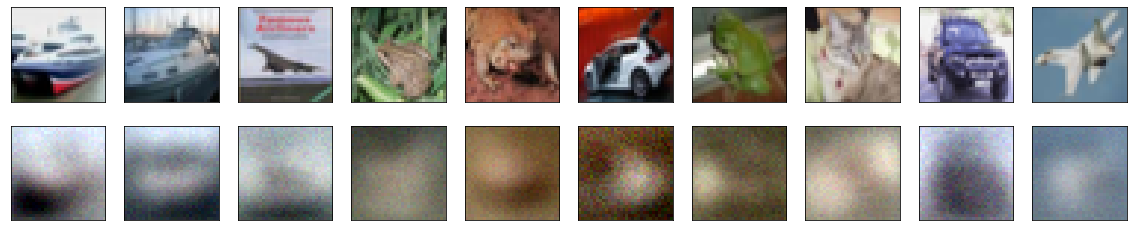

In [28]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,(n+1)):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(32,32,3))
    plt.gray()
  
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()